In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
le = LabelEncoder()

In [4]:
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])



In [5]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,2848,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,3346,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,10259,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,3337,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [7]:
df['rating'] = df['rating'].replace(np.nan, 0.0)


In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,2848,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,3346,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,10259,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,3337,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
df['rating'] = df['rating'].replace(0.0, np.mean(df['rating']))
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,2848,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,3346,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,10259,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,3337,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
df['genre'] = df['genre'].replace(np.nan, 'Drama')

In [11]:
df['genre'] = df['genre'].str.replace(',', '')

In [12]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,Drama Romance School Supernatural,Movie,1,9.37,200630
1,5114,2848,Action Adventure Drama Fantasy Magic Military ...,TV,64,9.26,793665
2,28977,3346,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.25,114262
3,9253,10259,Sci-Fi Thriller,TV,24,9.17,673572
4,9969,3337,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.16,151266


In [13]:
df['genre'] = le.fit_transform(df['genre'])

In [14]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,2686,Movie,1,9.37,200630
1,5114,2848,161,TV,64,9.26,793665
2,28977,3346,534,TV,51,9.25,114262
3,9253,10259,3240,TV,24,9.17,673572
4,9969,3337,534,TV,51,9.16,151266


In [15]:
df['type'] = df['type'].replace(np.nan, 0)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,2686,Movie,1,9.37,200630
1,5114,2848,161,TV,64,9.26,793665
2,28977,3346,534,TV,51,9.25,114262
3,9253,10259,3240,TV,24,9.17,673572
4,9969,3337,534,TV,51,9.16,151266


In [16]:
df.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', 0], dtype=object)

In [17]:
df['type'] = df['type'].replace('Movie', 1)

In [18]:
df['type'] = df['type'].replace('TV', 2)
df['type'] = df['type'].replace('OVA', 3)
df['type'] = df['type'].replace('Special', 4)
df['type'] = df['type'].replace('Music', 5)
df['type'] = df['type'].replace('ONA', 6)

In [19]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,5412,2686,1,1,9.37,200630
1,5114,2848,161,2,64,9.26,793665
2,28977,3346,534,2,51,9.25,114262
3,9253,10259,3240,2,24,9.17,673572
4,9969,3337,534,2,51,9.16,151266


In [20]:
y = df['rating']
y

0        9.370000
1        9.260000
2        9.250000
3        9.170000
4        9.160000
5        9.150000
6        9.130000
7        9.110000
8        9.100000
9        9.110000
10       9.060000
11       9.050000
12       9.040000
13       8.980000
14       8.930000
15       8.930000
16       8.920000
17       8.880000
18       8.840000
19       8.830000
20       8.830000
21       8.830000
22       8.820000
23       8.820000
24       8.810000
25       8.810000
26       8.800000
27       8.800000
28       8.780000
29       8.780000
           ...   
12264    6.420000
12265    6.352786
12266    5.430000
12267    4.110000
12268    2.860000
12269    4.080000
12270    3.000000
12271    5.200000
12272    4.140000
12273    4.000000
12274    6.352786
12275    3.140000
12276    4.000000
12277    4.660000
12278    3.610000
12279    6.352786
12280    6.352786
12281    4.530000
12282    6.352786
12283    4.950000
12284    4.450000
12285    6.352786
12286    4.670000
12287    4.330000
12288    4

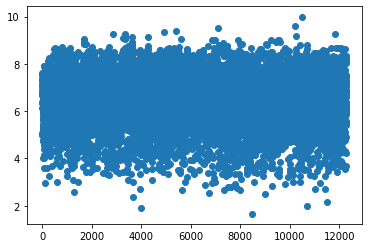

In [21]:
plt.scatter(df['name'], df['rating'])

In [22]:
km = KMeans(n_clusters = 5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_pred = km.fit_predict(df[['name', 'rating']])
y_pred

array([2, 3, 3, ..., 4, 4, 4])

In [24]:
df['cluster0'] = y_pred
df.head()

,anime_id,name,genre,type,episodes,rating,members,cluster0
0,32281,5412,2686,1,1,9.37,200630,2
1,5114,2848,161,2,64,9.26,793665,3
2,28977,3346,534,2,51,9.25,114262,3
3,9253,10259,3240,2,24,9.17,673572,4
4,9969,3337,534,2,51,9.16,151266,3


In [25]:
df.cluster0.unique()

array([2, 3, 4, 1, 0], dtype=int64)

Text(0, 0.5, 'rating')

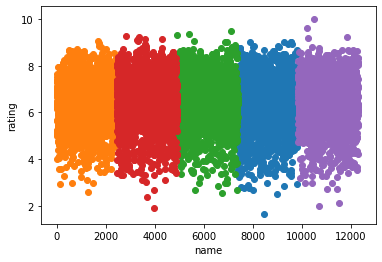

In [26]:
df1 = df[df.cluster0 == 0]
df2 = df[df.cluster0 == 1]
df3 = df[df.cluster0 == 2]
df4 = df[df.cluster0 == 3]
df5 = df[df.cluster0 == 4]

plt.scatter(df1['name'], df1['rating'])
plt.scatter(df2['name'], df2['rating'])
plt.scatter(df3['name'], df3['rating'])
plt.scatter(df4['name'], df4['rating'])
plt.scatter(df5['name'], df5['rating'])

plt.xlabel('name')
plt.ylabel('rating')


In [27]:
km.cluster_centers_

array([[8.61815531e+03, 6.46801289e+00],
       [1.22150000e+03, 6.48815914e+00],
       [6.14700000e+03, 6.48684016e+00],
       [3.67600000e+03, 6.50294182e+00],
       [1.10705000e+04, 6.41173438e+00]])

Text(0, 0.5, 'rating')

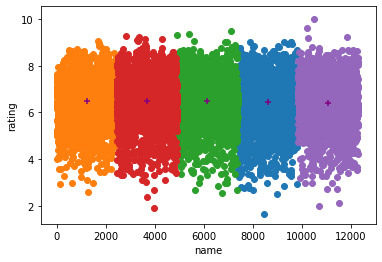

In [28]:
df1 = df[df.cluster0 == 0]
df2 = df[df.cluster0 == 1]
df3 = df[df.cluster0 == 2]
df4 = df[df.cluster0 == 3]
df5 = df[df.cluster0 == 4]

plt.scatter(df1['name'], df1['rating'])
plt.scatter(df2['name'], df2['rating'])
plt.scatter(df3['name'], df3['rating'])
plt.scatter(df4['name'], df4['rating'])
plt.scatter(df5['name'], df5['rating'])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='+', label = 'centroid')

plt.xlabel('name')
plt.ylabel('rating')


In [29]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['name', 'rating']])
    sse.append(km.inertia_)

In [30]:
sse

[154791436453.34744,
 38692907012.7806,
 17199161216.90916,
 9678879105.846344,
 6192740249.564657,
 4302337956.552015,
 3159469187.93462,
 2420509171.5719576,
 1912155529.21972]

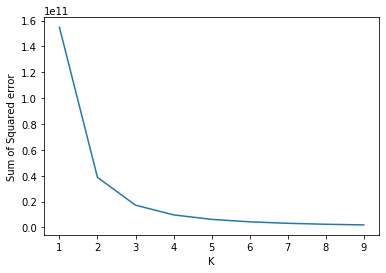

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)

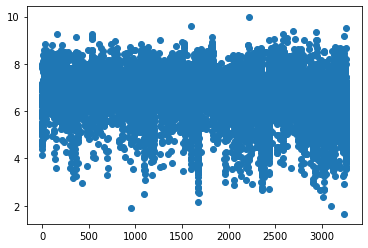

In [32]:
plt.scatter(df['genre'], df['rating'])

In [33]:
km = KMeans(n_clusters = 5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y_pred1 = km.fit_predict(df[['genre', 'rating']])
y_pred1

array([1, 3, 3, ..., 1, 1, 1])

In [35]:
df['cluster1'] = y_pred1
df.head()

,anime_id,name,genre,type,episodes,rating,members,cluster0,cluster1
0,32281,5412,2686,1,1,9.37,200630,2,1
1,5114,2848,161,2,64,9.26,793665,3,3
2,28977,3346,534,2,51,9.25,114262,3,3
3,9253,10259,3240,2,24,9.17,673572,4,1
4,9969,3337,534,2,51,9.16,151266,3,3


In [36]:
df.cluster1.unique()

array([1, 3, 2, 4, 0], dtype=int64)

Text(0, 0.5, 'rating')

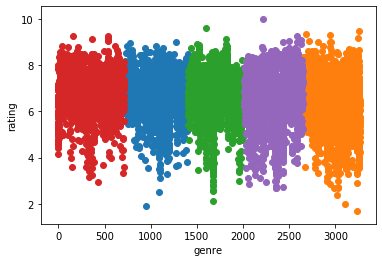

In [37]:
df1 = df[df.cluster1 == 0]
df2 = df[df.cluster1 == 1]
df3 = df[df.cluster1 == 2]
df4 = df[df.cluster1 == 3]
df5 = df[df.cluster1 == 4]

plt.scatter(df1['genre'], df1['rating'])
plt.scatter(df2['genre'], df2['rating'])
plt.scatter(df3['genre'], df3['rating'])
plt.scatter(df4['genre'], df4['rating'])
plt.scatter(df5['genre'], df5['rating'])

plt.xlabel('genre')
plt.ylabel('rating')


In [38]:
km.cluster_centers_

array([[1094.90927942,    6.72864431],
       [2973.96102151,    6.19163545],
       [1705.55926093,    6.48345658],
       [ 329.43734336,    6.81137339],
       [2321.40176678,    6.46364309]])

Text(0, 0.5, 'rating')

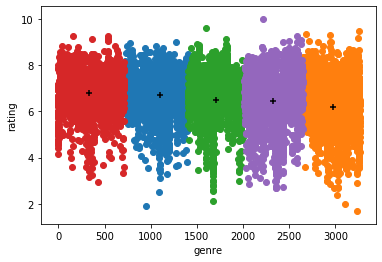

In [39]:
df1 = df[df.cluster1 == 0]
df2 = df[df.cluster1 == 1]
df3 = df[df.cluster1 == 2]
df4 = df[df.cluster1 == 3]
df5 = df[df.cluster1 == 4]

plt.scatter(df1['genre'], df1['rating'])
plt.scatter(df2['genre'], df2['rating'])
plt.scatter(df3['genre'], df3['rating'])
plt.scatter(df4['genre'], df4['rating'])
plt.scatter(df5['genre'], df5['rating'])

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker = '+', label = 'centroid')

plt.xlabel('genre')
plt.ylabel('rating')

In [40]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['genre', 'rating']])
    sse.append(km.inertia_)

In [41]:
sse

[10380253385.92878,
 2696300201.932257,
 1255337573.8761406,
 595827646.2900981,
 355530687.27678853,
 275118290.7103446,
 200553250.11202168,
 144446068.99164417,
 120011370.52003364]

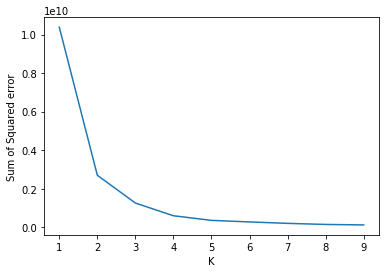

In [42]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)

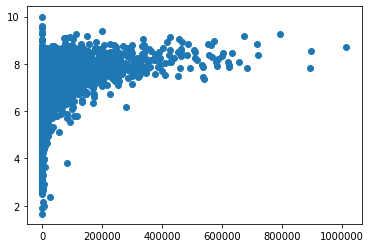

In [43]:
plt.scatter(df['members'], df['rating'])

In [44]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
y_pred2 = km.fit_predict(df[['members', 'rating']])
y_pred2

array([0, 1, 0, ..., 2, 2, 2])

In [46]:
df['cluster2'] = y_pred2

In [47]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,cluster0,cluster1,cluster2
0,32281,5412,2686,1,1,9.37,200630,2,1,0
1,5114,2848,161,2,64,9.26,793665,3,3,1
2,28977,3346,534,2,51,9.25,114262,3,3,0
3,9253,10259,3240,2,24,9.17,673572,4,1,1
4,9969,3337,534,2,51,9.16,151266,3,3,0


In [48]:
df.cluster2.unique()

array([0, 1, 2], dtype=int64)

Text(0, 0.5, 'rating')

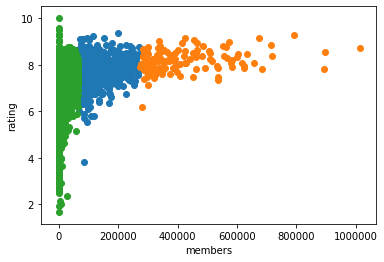

In [49]:
df1 = df[df.cluster2 == 0]
df2 = df[df.cluster2 == 1]
df3 = df[df.cluster2 == 2]

plt.scatter(df1['members'], df1['rating'])
plt.scatter(df2['members'], df2['rating'])
plt.scatter(df3['members'], df3['rating'])


plt.xlabel('members')
plt.ylabel('rating')

In [50]:
km.cluster_centers_

array([[1.24510490e+05, 7.69443948e+00],
       [4.20618328e+05, 8.17032000e+00],
       [6.37384346e+03, 6.36936193e+00]])

Text(0, 0.5, 'rating')

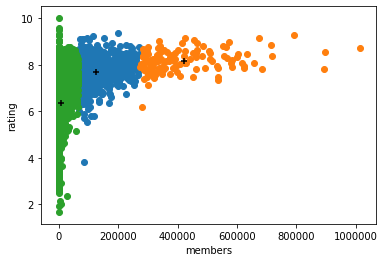

In [51]:
df1 = df[df.cluster2 == 0]
df2 = df[df.cluster2 == 1]
df3 = df[df.cluster2 == 2]

plt.scatter(df1['members'], df1['rating'])
plt.scatter(df2['members'], df2['rating'])
plt.scatter(df3['members'], df3['rating'])

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker = '+', label = 'centroid')

plt.xlabel('members')
plt.ylabel('rating')

In [52]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['members', 'rating']])
    sse.append(km.inertia_)

In [53]:
sse

[36944234274002.516,
 12981414870057.033,
 6304686115874.887,
 3584302233451.172,
 2368169635230.093,
 1689769717590.4368,
 1278959989926.292,
 980594116854.716,
 774316337533.3534]

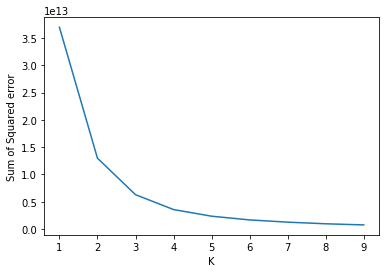

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)